In [0]:
import torch

x = torch.tensor(
    [[1., 2., 3., 4.],
     [6., 6., 7., 8.],
     [9., 10., 11., 12.]
    ], requires_grad=True  # потом по тензору захотим считать производные
    # requires_grad первращает тензор-константу в тензор-переменную
    # requires_grad говорит что тензор является перемееной по которой будем считать градиенты
)

device = torch.device('cuda:0')
x = x.to(device)
x.retain_grad()  # нужно если переводим на cuda чтобы сохранить там градиент

function = 10 * (x**2).sum()  # наша функция
function.backward()  # ищем производную
print(x.grad)  # градиент появляется именно в переменной тензора



tensor([[ 20.,  40.,  60.,  80.],
        [120., 120., 140., 160.],
        [180., 200., 220., 240.]], device='cuda:0')


In [0]:
x, x.data  # в x.data лежит тот же тензор с requires_grad=False

(tensor([[ 1.,  2.,  3.,  4.],
         [ 6.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]], device='cuda:0', grad_fn=<CopyBackwards>),
 tensor([[ 1.,  2.,  3.,  4.],
         [ 6.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]], device='cuda:0'))

In [0]:
x.data = x.data - 0.001*x.grad

In [0]:
x.data

tensor([[ 0.9800,  1.9600,  2.9400,  3.9200],
        [ 5.8800,  5.8800,  6.8600,  7.8400],
        [ 8.8200,  9.8000, 10.7800, 11.7600]], device='cuda:0')

In [0]:
# ! в x.data кладется сумма градиентов всех при итеративных процессах
# тогда нужно обнулсять градиент
x.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], device='cuda:0')

In [0]:
# Делает градиентный шаг
# Принимает функция для оптимизации (функция потерь) и предыдущее состояние
def make_gradient_step(function, variable):
  function_result = function(variable) # значение ф-ции в предыдущим значении
  function_result.backward()
  variable.data = variable.data - 0.001*variable.grad  # грд. шаг
  variable.grad.zero_()

# Функция параболы
def function_parabola(variable):
  return 10 * (variable ** 2).sum()

# Начальное состояние 
x = torch.tensor([8., 8.], requires_grad=True)


# 500 градиентных шагов
for i in range(500):
  make_gradient_step(function_parabola, x)

print(x.data)

tensor([0.0003, 0.0003])


In [0]:
# Добавим оптимайзер (обертка для тензора x)
x = torch.tensor([8., 8.], requires_grad=True)
var_history = []
fn_history = []
optimaizer = torch.optim.SGD([x], lr=0.001) # стохатический спуск

def make_gradient_step(function, variable):
  function_result = function(variable) # значение ф-ции в предыдущим значении
  function_result.backward()
   # в x уже занесалась производная на пред. шаге.
   # теперь optimaizer - Обертка над x, сделаем шаг спуска через оптимайзер
  optimaizer.step() 
  optimaizer.zero_grad()


def function_parabola(variable):
  return 10 * (variable ** 2).sum()




# 500 градиентных шагов
for i in range(500):
  # сохраняем историю для визулизации
  var_history.append(x.data.cpu().numpy().copy())
  fn_history.append(function_parabola(x).data.cpu().numpy().copy())
  # шаг спуска
  make_gradient_step(function_parabola, x)

In [0]:
# Визуализация градиентного спуска
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')


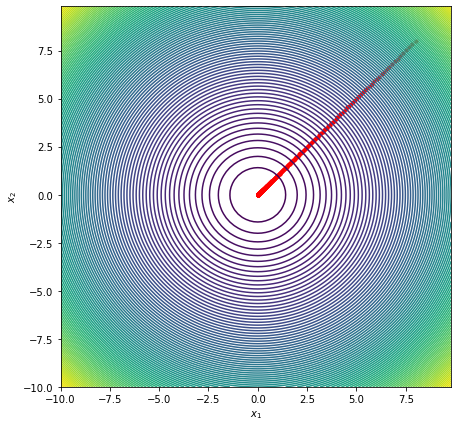

In [0]:
# Визуализируем 
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r')

Text(0, 0.5, 'function value')

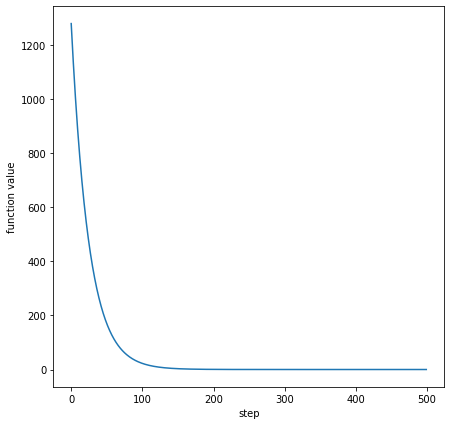

In [0]:
# Смотрим функцию потери (loss function = parabola)
plt.figure(figsize=(7,7))
plt.plot(fn_history)
plt.xlabel('step')
plt.ylabel('function value')